In [2]:
from TSP import read_matrix
import matplotlib.pyplot as plt
from GA import genetic_algorithm

def solve(problem, 
          population_size=100, 
          generations=100, 
          mutation_rate=0.1, 
          mutation_algorithm='swap', 
          crossover_algorithm='order', 
          selection_algorithm='elitism'):
    n_cities = len(problem)
    
    solution = genetic_algorithm(n_cities, problem, 
                                 population_size=population_size, 
                                 generations=generations, 
                                 mutation_rate=mutation_rate, 
                                 mutation_algorithm=mutation_algorithm, 
                                 crossover_algorithm=crossover_algorithm, 
                                 selection_algorithm=selection_algorithm)
    
    return solution['distance'], solution['route'], solution['fitness']

def plot_fitness(fitness):
    plt.plot(fitness)
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.title("Fitness over generations")
    plt.show()

In [3]:
problem1 = read_matrix('data/15Cities-1194.txt')

# Trường hợp 1
Tăng một chút về cả ba tham số

1194
[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1, 0]


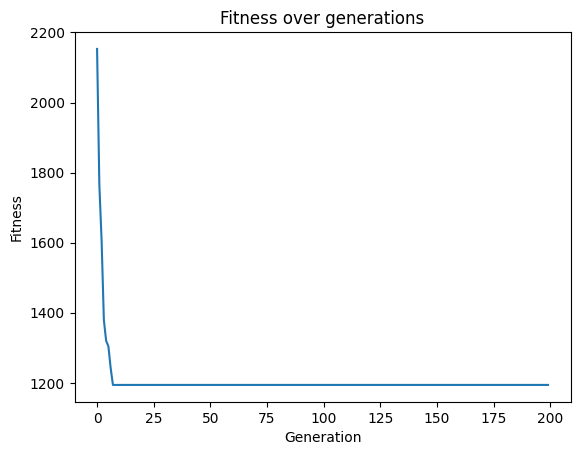

In [ ]:
distances1, route1, fitness1 = solve(problem1, generations=200, mutation_rate=0.05, population_size=200)
while (distances1 != 1194):
    distances1, route1, fitness1 = solve(problem1, generations=200, mutation_rate=0.05, population_size=200)
print(distances1)
print(route1)
plot_fitness(fitness1)

* Với bộ tham số này sẽ giải quyết được trường hợp dưới 15 đỉnh với tốc độ khá nhanh
---

In [ ]:
problem2 = read_matrix('data/26Cities-937.txt')

1045
[0, 1, 2, 13, 14, 12, 10, 9, 8, 4, 3, 5, 6, 7, 15, 18, 19, 17, 25, 22, 23, 24, 21, 20, 16, 11, 0]


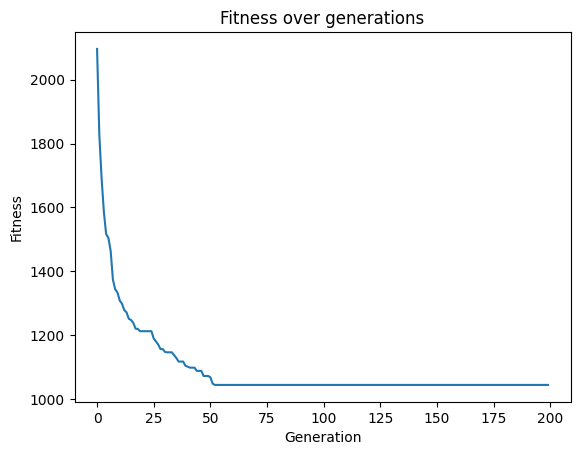

In [8]:
# Khi tăng đồng thời 2 tham số generations và population_size, kết quả tối ưu nhất đạt đc là xấp xỉ 1000. Khá là gần với kết quả tối ưu
distances2, route2, fitness2 = solve(problem2, generations=200, mutation_rate=0.1, population_size=300)
while (distances2 > 1050):
    distances2, route2, fitness2 = solve(problem2, generations=200, mutation_rate=0.1, population_size=300)
print(distances2)
print(route2)
plot_fitness(fitness2)

937
[0, 1, 2, 3, 5, 4, 6, 7, 8, 9, 13, 14, 12, 11, 10, 15, 18, 19, 17, 16, 20, 21, 25, 22, 23, 24, 0]


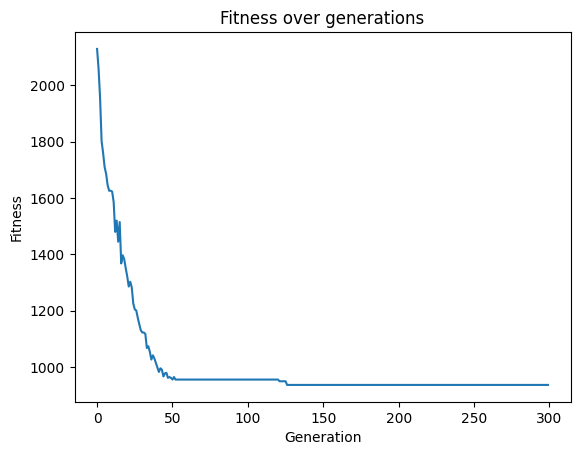

In [9]:
# Với tham số dưới đây kết hợp với việc đổi thuật toán selection_algorithm từ 'elitism' sang 'tournament' giúp tìm được nghiệm chính xác 
# với thời gian không quá lâu
distances2, route2, fitness2 = solve(problem2, generations=300, mutation_rate=0.02, population_size=500, selection_algorithm='tournament')
while (distances2 != 937):
    distances2, route2, fitness2 = solve(problem2, generations=300, mutation_rate=0.02, population_size=500, selection_algorithm='tournament')
print(distances2)
print(route2)
plot_fitness(fitness2)

In [59]:
problem3 = read_file('data/42Cities-699.txt')

851
[0, 1, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 29, 27, 28, 30, 5, 6, 4, 3, 2, 7, 8, 9, 24, 25, 26, 23, 11, 10, 22, 21, 20, 16, 12, 13, 14, 15, 17, 18, 19, 0]


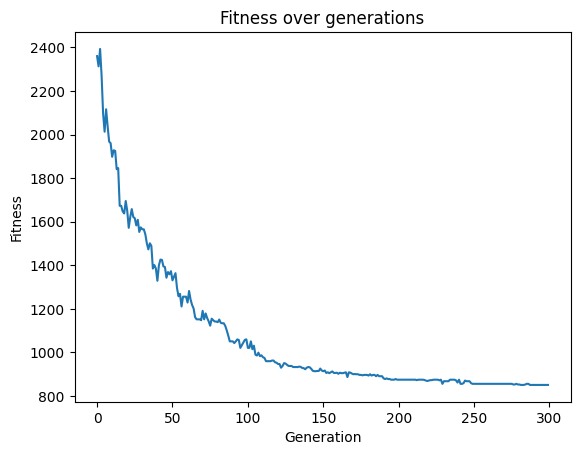

In [60]:
# Sử dụng tương tự thì lúc này chênh lệch cũng không quá lớn, nhưng vẫn chưa tìm ra được kết quả tối ưu
distances3, route3, fitness3 = solve(problem3, generations=300, mutation_rate=0.02, population_size=500, selection_algorithm='tournament')
while (distances3 > 1000):
    distances3, route3, fitness3 = solve(problem3, generations=300, mutation_rate=0.02, population_size=500, selection_algorithm='tournament')
print(distances3)
print(route3)
plot_fitness(fitness3)

743
[0, 1, 4, 3, 2, 8, 7, 6, 5, 30, 29, 25, 24, 9, 11, 10, 23, 26, 21, 22, 16, 12, 13, 14, 15, 17, 18, 19, 20, 27, 28, 32, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 0]


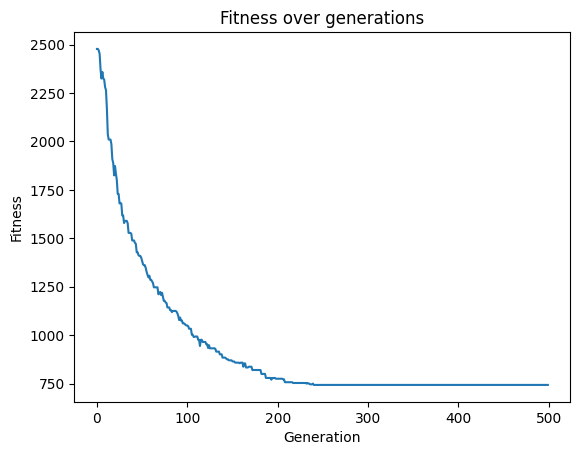

In [200]:
# tăng kích thước thế hệ và tỷ lệ lai lên, đồng thời đổi thuật toán mutation_algorithm từ 'swap' sang 'inversion' giúp tìm ra kết quả tốt hơn nhưng đổi lại
# thời gian chạy lâu hơn
distances3, route3, fitness3 = solve(problem3, generations=500, mutation_rate=0.2, population_size=400, 
                                     selection_algorithm='tournament', mutation_algorithm='inversion', crossover_algorithm='uniform')
while (distances3 > 750):
    distances3, route3, fitness3 = solve(problem3, generations=500, mutation_rate=0.2, population_size=400, 
                                     selection_algorithm='tournament', mutation_algorithm='inversion', crossover_algorithm='uniform')
print(distances3)
print(route3)
plot_fitness(fitness3)

722
[0, 1, 41, 40, 39, 38, 4, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 20, 19, 18, 17, 15, 14, 13, 12, 16, 21, 22, 10, 11, 9, 24, 23, 26, 25, 5, 6, 7, 8, 2, 3, 0]


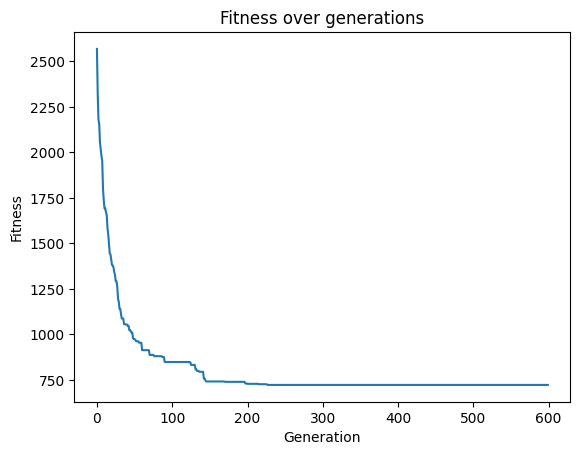

In [201]:
# đê crossover về mặc định thì tốc độ cải thiện rõ, kết quả cũng khá tối ưu
distances3, route3, fitness3 = solve(problem3, generations=600, mutation_rate=0.2, population_size=100, 
                                     selection_algorithm='rank', mutation_algorithm='inversion', crossover_algorithm='order')
while (distances3 > 750):
    distances3, route3, fitness3 = solve(problem3, generations=600, mutation_rate=0.2, population_size=100, 
                                     selection_algorithm='rank', mutation_algorithm='inversion', crossover_algorithm='order')
print(distances3)
print(route3)
plot_fitness(fitness3)

In [89]:
problem4 = read_file('data/48Cities-33523.txt')

34778
[0, 7, 8, 39, 2, 21, 15, 40, 33, 47, 4, 28, 1, 3, 25, 41, 9, 34, 44, 23, 31, 38, 20, 12, 24, 13, 22, 10, 46, 19, 11, 14, 32, 45, 35, 29, 42, 16, 26, 18, 36, 5, 27, 6, 17, 43, 30, 37, 0]


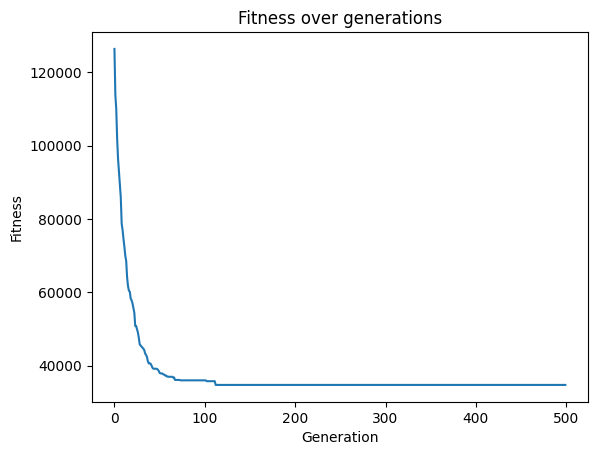

In [235]:
distances4, route4, fitness4 = solve(problem4, generations=500, mutation_rate=0.2, population_size=500, 
                                     selection_algorithm='rank', mutation_algorithm='inversion', crossover_algorithm='order')
while (distances4 > 36000):
    distances4, route4, fitness4 = solve(problem4, generations=500, mutation_rate=0.2, population_size=400, 
                                     selection_algorithm='rank', mutation_algorithm='inversion', crossover_algorithm='order')
print(distances4)
print(route4)
plot_fitness(fitness4)